In [1]:
import pandas as pd
import numpy as np

# TheMovieDB.org - tmdb.movies.csv

*only movies from 2010-2018

*from https://developers.themoviedb.org/3/discover/movie-discover

In [2]:
tmdb_df = pd.read_csv("data/tmdb.movies.csv.gz")
tmdb_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [3]:
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
Unnamed: 0           26517 non-null int64
genre_ids            26517 non-null object
id                   26517 non-null int64
original_language    26517 non-null object
original_title       26517 non-null object
popularity           26517 non-null float64
release_date         26517 non-null object
title                26517 non-null object
vote_average         26517 non-null float64
vote_count           26517 non-null int64
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


# TheMovieDB.org - tn.movie_budgets.csv

*includes all movies from https://www.the-numbers.com/movie/budgets/all

In [3]:
tn_budgets_df = pd.read_csv("data/tn.movie_budgets.csv.gz")
tn_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [4]:
tn_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: int64(1), object(5)
memory usage: 271.1+ KB


# IMDB Title Basics

In [5]:
imdb_title_basics_df = pd.read_csv('data/imdb.title.basics.csv.gz')
imdb_title_basics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [6]:
imdb_title_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [7]:
#imdb_title_basics_df.join(tn_budgets_df, how="left")

In [8]:
imdb_title_basics_df = imdb_title_basics_df.rename(columns = {'primary_title': 'movie', "release_date": "start_year"})
imdb_title_basics_df.head()

,tconst,movie,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [9]:
tn_budgets_df["start_year"] = tn_budgets_df.release_date.map(lambda x: int(x[-4:]))
tn_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,start_year
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017


In [10]:
total_df = pd.merge(imdb_title_basics_df, tn_budgets_df, on=["movie", "start_year"])

In [11]:
total_df.head()

,tconst,movie,original_title,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",26,"Dec 31, 2012","$45,000,000",$0,"$73,706"
1,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",37,"Dec 25, 2013","$91,000,000","$58,236,838","$187,861,183"
2,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",67,"Sep 19, 2014","$28,000,000","$26,017,685","$62,108,587"
3,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",34,"Jun 12, 2015","$215,000,000","$652,270,625","$1,648,854,864"
4,tt0376136,The Rum Diary,The Rum Diary,2011,119.0,"Comedy,Drama",16,"Oct 28, 2011","$45,000,000","$13,109,815","$21,544,732"


In [12]:
total_df = total_df.drop("original_title", axis=1)

In [13]:
total_df.production_budget = total_df.production_budget.map(lambda x: x.replace("$", ""))

In [14]:
total_df.production_budget = total_df.production_budget.map(lambda x: x.replace(",", ""))

In [15]:
total_df.domestic_gross = total_df.domestic_gross.map(lambda x: x.replace("$", ""))

In [16]:
total_df.domestic_gross = total_df.domestic_gross.map(lambda x: x.replace(",", ""))

In [17]:
total_df.worldwide_gross = total_df.worldwide_gross.map(lambda x: x.replace("$", ""))

In [18]:
total_df.worldwide_gross = total_df.worldwide_gross.map(lambda x: x.replace(",", ""))

In [19]:
total_df.production_budget = total_df.production_budget.map(lambda x: int(x))

In [20]:
total_df.domestic_gross = total_df.domestic_gross.map(lambda x: int(x))

In [21]:
total_df.worldwide_gross = total_df.worldwide_gross.map(lambda x: int(x))

In [22]:
total_df.head()

,tconst,movie,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,2012,91.0,"Action,Animation,Comedy",26,"Dec 31, 2012",45000000,0,73706
1,tt0359950,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",37,"Dec 25, 2013",91000000,58236838,187861183
2,tt0365907,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",67,"Sep 19, 2014",28000000,26017685,62108587
3,tt0369610,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",34,"Jun 12, 2015",215000000,652270625,1648854864
4,tt0376136,The Rum Diary,2011,119.0,"Comedy,Drama",16,"Oct 28, 2011",45000000,13109815,21544732


In [25]:
total_df['ROI'] = total_df.worldwide_gross - total_df.production_budget

In [26]:
total_df.head()

,tconst,movie,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross,ROI
0,tt0249516,Foodfight!,2012,91.0,"Action,Animation,Comedy",26,"Dec 31, 2012",45000000,0,73706,-44926294
1,tt0359950,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",37,"Dec 25, 2013",91000000,58236838,187861183,96861183
2,tt0365907,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",67,"Sep 19, 2014",28000000,26017685,62108587,34108587
3,tt0369610,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",34,"Jun 12, 2015",215000000,652270625,1648854864,1433854864
4,tt0376136,The Rum Diary,2011,119.0,"Comedy,Drama",16,"Oct 28, 2011",45000000,13109815,21544732,-23455268


In [24]:
total_df.sort_values("ROI", ascending=False)

KeyError: 'ROI'

In [27]:
genres_df = total_df.genres.str.split(",", 2, expand=True)

In [28]:
total_df["genre1"] = genres_df[0]
total_df.head()

,tconst,movie,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross,ROI,genre1
0,tt0249516,Foodfight!,2012,91.0,"Action,Animation,Comedy",26,"Dec 31, 2012",45000000,0,73706,-44926294,Action
1,tt0359950,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",37,"Dec 25, 2013",91000000,58236838,187861183,96861183,Adventure
2,tt0365907,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",67,"Sep 19, 2014",28000000,26017685,62108587,34108587,Action
3,tt0369610,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",34,"Jun 12, 2015",215000000,652270625,1648854864,1433854864,Action
4,tt0376136,The Rum Diary,2011,119.0,"Comedy,Drama",16,"Oct 28, 2011",45000000,13109815,21544732,-23455268,Comedy


In [29]:
total_df["genre2"] = genres_df[1]

In [30]:
total_df["genre3"] = genres_df[2]

In [31]:
total_df = total_df.drop("genres", axis=1)

In [32]:
total_df = total_df.drop("tconst", axis=1)

In [33]:
total_df = total_df.drop("id", axis=1)

In [34]:
total_df.head()

,movie,start_year,runtime_minutes,release_date,production_budget,domestic_gross,worldwide_gross,ROI,genre1,genre2,genre3
0,Foodfight!,2012,91.0,"Dec 31, 2012",45000000,0,73706,-44926294,Action,Animation,Comedy
1,The Secret Life of Walter Mitty,2013,114.0,"Dec 25, 2013",91000000,58236838,187861183,96861183,Adventure,Comedy,Drama
2,A Walk Among the Tombstones,2014,114.0,"Sep 19, 2014",28000000,26017685,62108587,34108587,Action,Crime,Drama
3,Jurassic World,2015,124.0,"Jun 12, 2015",215000000,652270625,1648854864,1433854864,Action,Adventure,Sci-Fi
4,The Rum Diary,2011,119.0,"Oct 28, 2011",45000000,13109815,21544732,-23455268,Comedy,Drama,None


In [35]:
test = total_df
test['release_month'] = test.release_date.map(lambda x: x[0:3])

In [36]:
test.release_month.head()

0    Dec
1    Dec
2    Sep
3    Jun
4    Oct
Name: release_month, dtype: object

In [37]:
import seaborn as sns

In [46]:
def month_to_num(x):
    
    if x == "Jan":
        x = 1
    elif x == "Feb":
        x = 2
    elif x == "Mar":
        x = 3
    elif x == "Apr":
        x = 4
    elif x == "May":
        x = 5
    elif x == "Jun":
        x = 6
    elif x == "Jul":
        x = 7
    elif x == "Aug":
        x = 8
    elif x == "Sep":
        x = 9
    elif x == "Oct":
        x = 10
    elif x == "Nov":
        x = 11
    elif x == "Dec":
        x = 12
    else:
        x = None
        
    return x

In [50]:
import matplotlib.pyplot as plt


<BarContainer object of 1547 artists>

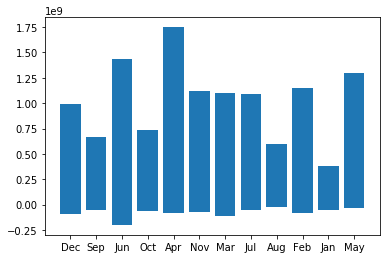

In [51]:
plt.bar(test['release_month'], test['ROI'])

In [58]:
grouptest = test.groupby('release_month').mean()

In [62]:
grouptest['ROI']

release_month
Apr    1.039507e+08
Aug    5.608424e+07
Dec    7.721986e+07
Feb    9.425114e+07
Jan    4.824310e+07
Jul    1.339167e+08
Jun    1.592518e+08
Mar    1.124471e+08
May    1.619229e+08
Nov    1.220695e+08
Oct    4.815247e+07
Sep    3.929639e+07
Name: ROI, dtype: float64

<BarContainer object of 12 artists>

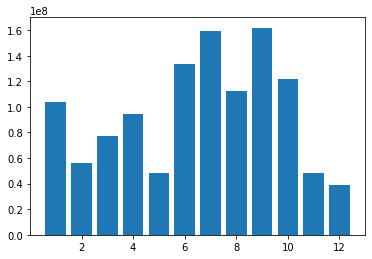

In [66]:
plt.bar([1,2,3,4,5,6,7,8,9,10,11,12], grouptest['ROI'])

In [67]:
test.release_month = test.release_month.map(lambda x: month_to_num(x))

In [68]:
test.head()

,movie,start_year,runtime_minutes,release_date,production_budget,domestic_gross,worldwide_gross,ROI,genre1,genre2,genre3,release_month
0,Foodfight!,2012,91.0,"Dec 31, 2012",45000000,0,73706,-44926294,Action,Animation,Comedy,12
1,The Secret Life of Walter Mitty,2013,114.0,"Dec 25, 2013",91000000,58236838,187861183,96861183,Adventure,Comedy,Drama,12
2,A Walk Among the Tombstones,2014,114.0,"Sep 19, 2014",28000000,26017685,62108587,34108587,Action,Crime,Drama,9
3,Jurassic World,2015,124.0,"Jun 12, 2015",215000000,652270625,1648854864,1433854864,Action,Adventure,Sci-Fi,6
4,The Rum Diary,2011,119.0,"Oct 28, 2011",45000000,13109815,21544732,-23455268,Comedy,Drama,None,10


In [69]:
grouptest = test.groupby('release_month').mean()

In [70]:
grouptest['ROI']

release_month
1     4.824310e+07
2     9.425114e+07
3     1.124471e+08
4     1.039507e+08
5     1.619229e+08
6     1.592518e+08
7     1.339167e+08
8     5.608424e+07
9     3.929639e+07
10    4.815247e+07
11    1.220695e+08
12    7.721986e+07
Name: ROI, dtype: float64

([<matplotlib.axis.YTick at 0x1a2545ad68>,
 <a list of 9 Text yticklabel objects>)

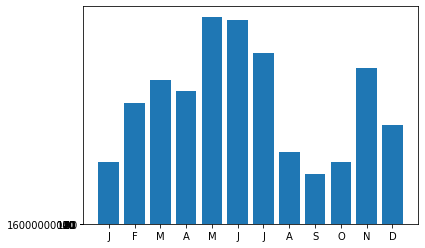

In [85]:
plt.bar(grouptest.index, grouptest.ROI)
plt.xticks(range(1,13), ['J','F','M','A','M','J','J','A','S','O','N','D'])

plt.yticks(range(0, 9), [0, 20, 40, 60, 80, 100, 120, 140, 16000000000])

In [86]:
test.genre1.unique()

array(['Action', 'Adventure', 'Comedy', 'Horror', 'Drama', 'Biography',
       'Crime', 'Animation', 'Fantasy', nan, 'Documentary', 'Mystery',
       'Thriller', 'Musical', 'Romance', 'Sci-Fi', 'Family', 'Music',
       'Western'], dtype=object)

In [87]:
test.genre2.unique()

array(['Animation', 'Comedy', 'Crime', 'Adventure', 'Drama', 'Family',
       None, 'Mystery', 'Romance', 'Thriller', 'Horror', 'Fantasy',
       'History', 'War', 'Musical', nan, 'Biography', 'Music', 'Sci-Fi',
       'Sport', 'Documentary', 'Western'], dtype=object)

In [88]:
test.genre3.unique()

array(['Comedy', 'Drama', 'Sci-Fi', None, 'Romance', 'Thriller', 'Family',
       'History', 'War', 'Animation', 'Fantasy', 'Sport', 'Crime',
       'Music', 'Mystery', 'Horror', 'Western', nan, 'Documentary',
       'Musical', 'Biography', 'Reality-TV'], dtype=object)

In [110]:
action = test.loc[(test['genre1'] == 'Action') | (test['genre2'] == 'Action') | (test['genre3'] == 'Action')]

In [111]:
action.mean().ROI

158166380.17256638

In [93]:
comedy.head()

,movie,start_year,runtime_minutes,release_date,production_budget,domestic_gross,worldwide_gross,ROI,genre1,genre2,genre3,release_month
0,Foodfight!,2012,91.0,"Dec 31, 2012",45000000,0,73706,-44926294,Action,Animation,Comedy,12
1,The Secret Life of Walter Mitty,2013,114.0,"Dec 25, 2013",91000000,58236838,187861183,96861183,Adventure,Comedy,Drama,12
4,The Rum Diary,2011,119.0,"Oct 28, 2011",45000000,13109815,21544732,-23455268,Comedy,Drama,None,10
5,The Three Stooges,2012,92.0,"Apr 13, 2012",30000000,44338224,54052249,24052249,Comedy,Family,None,4
6,Anderson's Cross,2010,98.0,"Dec 31, 2010",300000,0,0,-300000,Comedy,Drama,Romance,12


In [108]:
def genre_mean(df, genrelist):
    
    roi_means = []
    
    for gen in genrelist:
        genrerows = df.loc[(df['genre1'] == gen) | (df['genre2'] == gen) | (df['genre3'] == gen)]
        
        roi_means.append(genrerows.mean().ROI)
        
    return roi_means

In [109]:
genre_mean(test, ["Action","Comedy"])


[158166380.17256638, 92326332.92870906]

In [112]:
genre_list = ['Action', 'Adventure', 'Comedy', 'Horror', 'Drama', 'Biography', 'Crime', 'Animation', 'Fantasy', 'Documentary', 'Mystery', 'Thriller', 'Musical', 'Romance', 'Sci-Fi', 'Family', 'Music', 'Western', 'History', 'Sport', 'War', 'Reality-TV']

In [113]:
genre_mean(test, genre_list)

[158166380.17256638,
 242286998.694051,
 92326332.92870906,
 50517684.96791444,
 45216215.98384926,
 54873788.59259259,
 47982740.03404255,
 276181736.75490195,
 159409570.37096775,
 24691181.296296295,
 63554352.5625,
 79785150.32462686,
 254266964.55555555,
 45319611.957671955,
 249117127.52985075,
 124610843.8,
 56460271.37254902,
 47218943.0,
 49439560.925,
 27435814.05882353,
 29517132.11764706,
 -1000000.0]

In [140]:
nozeros = test.loc[(test.domestic_gross != 0) & (test.worldwide_gross != 0)]

In [151]:
sortednozeros = nozeros.sort_values(by = "worldwide_gross")
sortednozeros[30:75]

,movie,start_year,runtime_minutes,release_date,production_budget,domestic_gross,worldwide_gross,ROI,genre1,genre2,genre3,release_month
957,The Canyons,2013,99.0,"Aug 2, 2013",250000,59671,62375,-187625,Drama,Thriller,None,8
725,Freaks of Nature,2015,92.0,"Oct 30, 2015",33000000,70958,70958,-32929042,Comedy,Horror,Sci-Fi,10
1072,Pump,2014,88.0,"Sep 19, 2014",2000000,72277,72277,-1927723,Documentary,None,None,9
453,5 Days of War,2011,113.0,"Aug 19, 2011",12000000,17479,87793,-11912207,Action,Drama,War,8
491,Vamps,2012,92.0,"Nov 2, 2012",16000000,3361,94812,-15905188,Comedy,Horror,Romance,11
776,Hardflip,2012,112.0,"Jun 1, 2012",1000000,96734,96734,-903266,Action,Drama,None,6
449,8: The Mormon Proposition,2010,80.0,"Jun 18, 2010",2500000,100280,100280,-2399720,Documentary,None,None,6
1148,Camp X-Ray,2014,117.0,"Oct 17, 2014",1000000,9837,101053,-898947,Drama,War,None,10
217,Blood Done Sign My Name,2010,128.0,"Feb 19, 2010",10000000,109383,109383,-9890617,Drama,None,None,2
1161,Road Hard,2015,98.0,"Mar 6, 2015",1500000,113169,113169,-1386831,Comedy,None,None,3


In [144]:
sortednozeros.describe()

,start_year,runtime_minutes,production_budget,domestic_gross,worldwide_gross,ROI,release_month
count,1370.000000,1357.000000,1.370000e+03,1.370000e+03,1.370000e+03,1.370000e+03,1370.000000
mean,2013.878832,108.285188,4.906805e+07,6.254886e+07,1.566260e+08,1.075580e+08,7.084672
std,2.619236,18.701518,5.740899e+07,8.702606e+07,2.414072e+08,2.000063e+08,3.350717
min,2010.000000,4.000000,2.700000e+04,3.880000e+02,5.280000e+02,-2.002376e+08,1.000000
25%,2012.000000,96.000000,1.000000e+07,8.224288e+06,1.705614e+07,8.264382e+05,4.000000
50%,2014.000000,106.000000,2.800000e+07,3.445786e+07,6.531321e+07,3.137213e+07,7.000000
75%,2016.000000,118.000000,6.100000e+07,7.573803e+07,1.767351e+08,1.208044e+08,10.000000
max,2019.000000,180.000000,4.106000e+08,7.000596e+08,2.048134e+09,1.748134e+09,12.000000


In [145]:
d = list(zip(genre_list, genre_mean(test, genre_list)))
testdf = pd.DataFrame(d, columns=['Genre','Mean ROI'])

,Genre,Mean ROI
0,Action,1.581664e+08
1,Adventure,2.422870e+08
2,Comedy,9.232633e+07
3,Horror,5.051768e+07
4,Drama,4.521622e+07


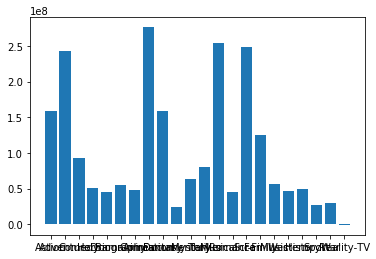

In [231]:
d = list(zip(genre_list, genre_mean(test, genre_list)))
testdf = pd.DataFrame(d, columns=['Genre','Mean ROI'])
plt.bar(testdf.Genre, testdf['Mean ROI'])
testdf.head()

In [120]:
sorted_testdf = testdf.sort_values(by='Mean ROI', ascending=False)
sorted_total_df = total_df.sort_values(by= )

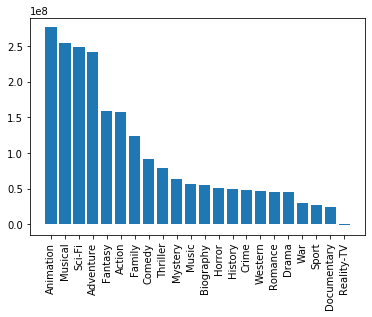

In [125]:
sorted_testdf = testdf.sort_values(by='Mean ROI', ascending=False)
sorted_total_df = total_df.sort_values(by= )
plt.bar(sorted_testdf.Genre, sorted_testdf['Mean ROI'])
plt.xticks(rotation = "vertical");

In [122]:
d

[('Action', 158166380.17256638),
 ('Adventure', 242286998.694051),
 ('Comedy', 92326332.92870906),
 ('Horror', 50517684.96791444),
 ('Drama', 45216215.98384926),
 ('Biography', 54873788.59259259),
 ('Crime', 47982740.03404255),
 ('Animation', 276181736.75490195),
 ('Fantasy', 159409570.37096775),
 ('Documentary', 24691181.296296295),
 ('Mystery', 63554352.5625),
 ('Thriller', 79785150.32462686),
 ('Musical', 254266964.55555555),
 ('Romance', 45319611.957671955),
 ('Sci-Fi', 249117127.52985075),
 ('Family', 124610843.8),
 ('Music', 56460271.37254902),
 ('Western', 47218943.0),
 ('History', 49439560.925),
 ('Sport', 27435814.05882353),
 ('War', 29517132.11764706),
 ('Reality-TV', -1000000.0)]

In [123]:
sorted_testdf

,Genre,Mean ROI
7,Animation,2.761817e+08
12,Musical,2.542670e+08
14,Sci-Fi,2.491171e+08
1,Adventure,2.422870e+08
8,Fantasy,1.594096e+08
0,Action,1.581664e+08
15,Family,1.246108e+08
2,Comedy,9.232633e+07
11,Thriller,7.978515e+07
10,Mystery,6.355435e+07


In [128]:
horror_check = test.loc[(test.genre1 == "Horror")|(test.genre2 == "Horror")|(test.genre3 == "Horror")]

In [130]:
horror_check.sort_values(by = "ROI", ascending = False)

,movie,start_year,runtime_minutes,release_date,production_budget,domestic_gross,worldwide_gross,ROI,genre1,genre2,genre3,release_month
376,It,2017,135.0,"Sep 8, 2017",35000000,327481748,697457969,662457969,Horror,Thriller,None,9
1006,Coco,2017,98.0,"Nov 22, 2017",175000000,209726015,798008101,623008101,Horror,None,None,11
1409,The Meg,2018,113.0,"Aug 10, 2018",178000000,145443742,529530715,351530715,Action,Horror,Sci-Fi,8
72,World War Z,2013,116.0,"Jun 21, 2013",190000000,202359711,531514650,341514650,Action,Adventure,Horror,6
1506,A Quiet Place,2018,90.0,"Apr 6, 2018",17000000,188024361,334522294,317522294,Drama,Horror,Sci-Fi,4
431,The Conjuring,2013,112.0,"Jul 19, 2013",20000000,137400141,318000141,298000141,Horror,Mystery,Thriller,7
1439,Annabelle: Creation,2017,109.0,"Aug 11, 2017",15000000,102092201,305384865,290384865,Horror,Mystery,Thriller,8
1431,Get Out,2017,104.0,"Feb 24, 2017",5000000,176040665,255367951,250367951,Horror,Mystery,Thriller,2
1200,Annabelle,2014,99.0,"Oct 3, 2014",6500000,84273813,256862920,250362920,Horror,Mystery,Thriller,10
464,Halloween,2018,106.0,"Oct 19, 2018",10000000,159342015,254900667,244900667,Horror,Thriller,None,10


In [152]:
test1 = test.loc[test.worldwide_gross > 100000]

In [155]:
test1.sort_values(by = 'worldwide_gross')

,movie,start_year,runtime_minutes,release_date,production_budget,domestic_gross,worldwide_gross,ROI,genre1,genre2,genre3,release_month
449,8: The Mormon Proposition,2010,80.0,"Jun 18, 2010",2500000,100280,100280,-2399720,Documentary,None,None,6
1148,Camp X-Ray,2014,117.0,"Oct 17, 2014",1000000,9837,101053,-898947,Drama,War,None,10
217,Blood Done Sign My Name,2010,128.0,"Feb 19, 2010",10000000,109383,109383,-9890617,Drama,None,None,2
1161,Road Hard,2015,98.0,"Mar 6, 2015",1500000,113169,113169,-1386831,Comedy,None,None,3
189,Accidental Love,2015,100.0,"Mar 17, 2015",26000000,0,135436,-25864564,Comedy,Romance,None,3
1292,Cop Car,2015,88.0,"Aug 7, 2015",5000000,134552,143658,-4856342,Crime,Thriller,None,8
177,Love Ranch,2010,117.0,"Jun 30, 2010",25000000,137885,146149,-24853851,Biography,Comedy,Drama,6
1348,Kicks,2016,80.0,"Sep 9, 2016",10000000,150191,150191,-9849809,Adventure,Drama,None,9
980,Strangerland,2015,112.0,"Jul 10, 2015",10000000,17472,161097,-9838903,Drama,Mystery,Thriller,7
909,Escape from Tomorrow,2013,90.0,"Oct 11, 2013",650000,171962,171962,-478038,Drama,Fantasy,Horror,10


In [162]:
test.loc[test.movie == "The Promise"]

,movie,start_year,runtime_minutes,release_date,production_budget,domestic_gross,worldwide_gross,ROI,genre1,genre2,genre3,release_month
125,The Promise,2017,NaN,"Apr 21, 2017",90000000,8224288,10551417,-79448583,Drama,None,None,4
126,The Promise,2017,NaN,"Apr 21, 2017",90000000,8224288,10551417,-79448583,Comedy,None,None,4
127,The Promise,2017,114.0,"Apr 21, 2017",90000000,8224288,10551417,-79448583,Drama,Horror,Thriller,4
128,The Promise,2017,NaN,"Apr 21, 2017",90000000,8224288,10551417,-79448583,Drama,None,None,4


In [168]:
deduped_movies = test.loc[~test.duplicated('movie')]

In [170]:
deduped_movies.loc[125]

movie                 The Promise
start_year                   2017
runtime_minutes               NaN
release_date         Apr 21, 2017
production_budget        90000000
domestic_gross            8224288
worldwide_gross          10551417
ROI                     -79448583
genre1                      Drama
genre2                       None
genre3                       None
release_month                   4
Name: 125, dtype: object

In [174]:
test.loc[test.runtime_minutes != np.nan]

,movie,start_year,runtime_minutes,release_date,production_budget,domestic_gross,worldwide_gross,ROI,genre1,genre2,genre3,release_month
0,Foodfight!,2012,91.0,"Dec 31, 2012",45000000,0,73706,-44926294,Action,Animation,Comedy,12
1,The Secret Life of Walter Mitty,2013,114.0,"Dec 25, 2013",91000000,58236838,187861183,96861183,Adventure,Comedy,Drama,12
2,A Walk Among the Tombstones,2014,114.0,"Sep 19, 2014",28000000,26017685,62108587,34108587,Action,Crime,Drama,9
3,Jurassic World,2015,124.0,"Jun 12, 2015",215000000,652270625,1648854864,1433854864,Action,Adventure,Sci-Fi,6
4,The Rum Diary,2011,119.0,"Oct 28, 2011",45000000,13109815,21544732,-23455268,Comedy,Drama,None,10
5,The Three Stooges,2012,92.0,"Apr 13, 2012",30000000,44338224,54052249,24052249,Comedy,Family,None,4
6,Anderson's Cross,2010,98.0,"Dec 31, 2010",300000,0,0,-300000,Comedy,Drama,Romance,12
7,Tangled,2010,100.0,"Nov 24, 2010",260000000,200821936,586477240,326477240,Adventure,Animation,Comedy,11
8,John Carter,2012,132.0,"Mar 9, 2012",275000000,73058679,282778100,7778100,Action,Adventure,Sci-Fi,3
9,Dinner for Schmucks,2010,114.0,"Jul 30, 2010",69000000,73026337,86796502,17796502,Comedy,None,None,7


In [173]:
test

,movie,start_year,runtime_minutes,release_date,production_budget,domestic_gross,worldwide_gross,ROI,genre1,genre2,genre3,release_month
0,Foodfight!,2012,91.0,"Dec 31, 2012",45000000,0,73706,-44926294,Action,Animation,Comedy,12
1,The Secret Life of Walter Mitty,2013,114.0,"Dec 25, 2013",91000000,58236838,187861183,96861183,Adventure,Comedy,Drama,12
2,A Walk Among the Tombstones,2014,114.0,"Sep 19, 2014",28000000,26017685,62108587,34108587,Action,Crime,Drama,9
3,Jurassic World,2015,124.0,"Jun 12, 2015",215000000,652270625,1648854864,1433854864,Action,Adventure,Sci-Fi,6
4,The Rum Diary,2011,119.0,"Oct 28, 2011",45000000,13109815,21544732,-23455268,Comedy,Drama,None,10
5,The Three Stooges,2012,92.0,"Apr 13, 2012",30000000,44338224,54052249,24052249,Comedy,Family,None,4
6,Anderson's Cross,2010,98.0,"Dec 31, 2010",300000,0,0,-300000,Comedy,Drama,Romance,12
7,Tangled,2010,100.0,"Nov 24, 2010",260000000,200821936,586477240,326477240,Adventure,Animation,Comedy,11
8,John Carter,2012,132.0,"Mar 9, 2012",275000000,73058679,282778100,7778100,Action,Adventure,Sci-Fi,3
9,Dinner for Schmucks,2010,114.0,"Jul 30, 2010",69000000,73026337,86796502,17796502,Comedy,None,None,7


In [177]:
test.rename(columns = {'release_date': 'RELEASE_DATE'})

,movie,start_year,runtime_minutes,RELEASE_DATE,production_budget,domestic_gross,worldwide_gross,ROI,genre1,genre2,genre3,release_month
0,Foodfight!,2012,91.0,"Dec 31, 2012",45000000,0,73706,-44926294,Action,Animation,Comedy,12
1,The Secret Life of Walter Mitty,2013,114.0,"Dec 25, 2013",91000000,58236838,187861183,96861183,Adventure,Comedy,Drama,12
2,A Walk Among the Tombstones,2014,114.0,"Sep 19, 2014",28000000,26017685,62108587,34108587,Action,Crime,Drama,9
3,Jurassic World,2015,124.0,"Jun 12, 2015",215000000,652270625,1648854864,1433854864,Action,Adventure,Sci-Fi,6
4,The Rum Diary,2011,119.0,"Oct 28, 2011",45000000,13109815,21544732,-23455268,Comedy,Drama,None,10
5,The Three Stooges,2012,92.0,"Apr 13, 2012",30000000,44338224,54052249,24052249,Comedy,Family,None,4
6,Anderson's Cross,2010,98.0,"Dec 31, 2010",300000,0,0,-300000,Comedy,Drama,Romance,12
7,Tangled,2010,100.0,"Nov 24, 2010",260000000,200821936,586477240,326477240,Adventure,Animation,Comedy,11
8,John Carter,2012,132.0,"Mar 9, 2012",275000000,73058679,282778100,7778100,Action,Adventure,Sci-Fi,3
9,Dinner for Schmucks,2010,114.0,"Jul 30, 2010",69000000,73026337,86796502,17796502,Comedy,None,None,7


,movie,start_year,runtime_minutes,release_date,production_budget,domestic_gross,worldwide_gross,ROI,genre1,genre2,genre3,release_month
1194,Stung,2015,87.0,"Jul 3, 2015",2500000,0,0,-2500000,Action,Adventure,Comedy,7
99,The Dead Undead,2010,89.0,"Dec 31, 2010",1100000,0,0,-1100000,Action,Horror,Sci-Fi,12
1324,Code of Honor,2016,106.0,"May 6, 2016",8000000,0,0,-8000000,Action,Crime,Thriller,5
1325,The Dog Lover,2016,101.0,"Jul 8, 2016",2000000,0,0,-2000000,Drama,None,None,7
341,Butterfly,2010,90.0,"Dec 31, 2010",250000,0,0,-250000,Horror,Thriller,None,12
1247,Unnatural,2015,89.0,"Dec 31, 2015",3000000,0,0,-3000000,Action,Horror,Sci-Fi,12
1337,Rotor DR1,2015,98.0,"Oct 20, 2015",350000,0,0,-350000,Family,Sci-Fi,None,10
591,The Christmas Bunny,2010,98.0,"Dec 31, 2010",250000,0,0,-250000,Drama,Family,None,12
794,Indie Game: The Movie,2012,103.0,"May 18, 2012",100000,0,0,-100000,Documentary,Drama,None,5
792,Heroes of Dirt,2015,98.0,"Sep 4, 2015",175000,0,0,-175000,Action,Drama,Sport,9


In [182]:
grouped =(test.groupby('genre1').sum())

grouped = whole_df.groupby('directors_name').sum()

In [183]:
grouped.sort_values('ROI', ascending = False)

,start_year,runtime_minutes,production_budget,domestic_gross,worldwide_gross,ROI,release_month
genre1,,,,,,,
Action,910383,50208.0,35522530000,38761319146,107013733838,71491203838,3022
Adventure,324284,16391.0,13169300000,16238512667,45109535208,31940235208,1215
Comedy,605994,30706.0,6776335000,10811338230,19524457394,12748122394,2132
Drama,547716,28863.0,5330048950,7029690008,15409889224,10079840274,2097
Biography,229686,13328.0,2743020000,4333690560,8487520341,5744500341,997
Horror,173228,7901.0,1120550000,3138787635,6857813522,5737263522,565
Crime,151031,8295.0,1787840000,2028527087,4213652791,2425812791,638
Animation,18119,812.0,382500000,878903262,2112782428,1730282428,81
Fantasy,12079,646.0,399000000,642240815,1784546738,1385546738,35


In [189]:
test.release_month.value_counts()


12    196
10    167
11    154
9     151
3     133
7     128
8     126
6     123
5     103
4     103
2      93
1      70
Name: release_month, dtype: int64

In [190]:
test.release_month.value_counts()[1]

70

In [191]:
cxxvtestseries = test.release_month.value_counts()

In [228]:
cxxvtestseries.loc[cxxvtestseries > 125]

12    196
10    167
11    154
9     151
3     133
7     128
8     126
Name: release_month, dtype: int64

In [230]:
list(cxxvtestseries.index[cxxvtestseries > 125])
whole_df.directors_name.value_counts()
list(whole_df.directors_name.value_counts().index[whole_df.directors_name.valu])

[12, 10, 11, 9, 3, 7, 8]

In [226]:
# def less_than_cxxv(ser):
    
#     for x in range(1,13):
#         if ser[x] < 125
        
    
#     ser.loc[ser.release_month > 125]
    
#     print(ser)
        
    
# less_than_cxxv(cxxvtestseries)

def lessthan(ser):
    
    monthlist = []
    
    ser.map(lambda x: monthlist.append(ser.index[x]))

    print(monthlist)
    #     for x in range(1,13):
#         if ser[x] < 125:
#             monthlist.append(1)
            
# #             print(x)
#             print(ser.index[])

In [233]:
test.loc[(test.genre1 == 'Reality-TV') | (test.genre2 == 'Reality-TV') | (test.genre3 == 'Reality-TV')]

,movie,start_year,runtime_minutes,release_date,production_budget,domestic_gross,worldwide_gross,ROI,genre1,genre2,genre3,release_month
1428,Hush,2016,80.0,"Apr 8, 2016",1000000,0,0,-1000000,Documentary,Drama,Reality-TV,4


# Next Steps:

1. Change genre3 of Hush to 'Horror'.  Should fix our graphs.

2. We have graphs for ROI v genre, ROI v release month.  Other graphs to consider: genre v domestic gross? (this one is pretty much done also). Make a column for international gross and compare genre to that?  

3. Start summarizing our findings and making our deck.

In [236]:
test.iloc[1428]
test.at[1428, 'genre3'] = 'Horror'

In [240]:
test.loc[test.movie == 'Hush']

NameError: name 'genre3' is not defined